# Project

## Download Data

In [1]:
import urllib
import json
import pandas as pd
from bd_addons.interpro_data import *
from bd_addons.HmmPy import *
from bd_addons.metrics import *
from Bio import SearchIO, SeqIO

url = "https://www.ebi.ac.uk/interpro/api/protein/reviewed/entry/pfam/pf03060?format=json"

In [2]:
metadata, entries, gt = get_data(url, 1)


# 8 - Evaluate Ability of Matching sequences
Once we made the PSI-BLAST e HMM-searches we will have some files where all the sequences are... we should:

- Find a format that we can parse (there should be options in the documentations of thevarious methods);
- Decide a threshold for the E-value and take all the hits that are below that E value;
- All the remaining sequences (call them OUT_SEQs)are the ones that, according to our model, belong to the Domain family.
- Make a Confusion Matrix comparing OUT_SEQs with the ground truth.
- compute accuracy, sensitivity, specificty etc

## HMM Searches Performance

In [3]:
metrics_df, parsed_tblouts, parsed_domtblouts, parsed_psiblast = metrics_8(gt)
metrics_df

Computing metrics for: hmmsearch_out_C_1_denoised1_swissprot.domtblout
Computing metrics for: hmmsearch_out_C_1_swissprot.domtblout
Computing metrics for: hmmsearch_out_M_1.domtblout
Computing metrics for: hmmsearch_out_O_1.domtblout
Computing metrics for: out_psiblast_C_1_denoised1_swissprot_1iterations.xml
Computing metrics for: out_psiblast_C_1_denoised1_swissprot_2iterations.xml
Computing metrics for: out_psiblast_C_1_denoised1_swissprot_3iterations.xml
Computing metrics for: out_psiblast_C_1_swissprot_1iterations.xml
Computing metrics for: out_psiblast_C_1_swissprot_2iterations.xml
Computing metrics for: out_psiblast_C_1_swissprot_3iterations.xml
Computing metrics for: out_psiblast_C_3_denoised1_uniref90_1iterations.xml
Computing metrics for: out_psiblast_M_1.xml
Computing metrics for: out_psiblast_M_3_uniref90_1iterations.xml
Computing metrics for: out_psiblast_M_3_uniref90_2iterations.xml
Computing metrics for: out_psiblast_O_1.xml
Computing metrics for: out_psiblast_O_3_uniref9

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.996202,0.010624,1.000000,0.996202,0.998101,0.102875,0.021024
hmmsearch_out_C_1_swissprot.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179
hmmsearch_out_M_1.domtblout,0.996236,0.010718,1.000000,0.996235,0.998118,0.103331,0.021208
hmmsearch_out_O_1.domtblout,0.996230,0.010703,1.000000,0.996230,0.998115,0.103258,0.021179
out_psiblast_C_1_denoised1_swissprot_1iterations.xml,0.999759,0.140127,0.956522,0.999761,0.978141,0.366060,0.244444
out_psiblast_C_1_denoised1_swissprot_2iterations.xml,0.999083,0.042593,1.000000,0.999083,0.999542,0.206285,0.081705
out_psiblast_C_1_denoised1_swissprot_3iterations.xml,0.998876,0.035008,1.000000,0.998876,0.999438,0.186998,0.067647
out_psiblast_C_1_swissprot_1iterations.xml,0.999817,0.177419,0.956522,0.999819,0.978170,0.411912,0.299320
out_psiblast_C_1_swissprot_2iterations.xml,0.999131,0.044834,1.000000,0.999131,0.999566,0.211649,0.085821
out_psiblast_C_1_swissprot_3iterations.xml,0.998977,0.038333,1.000000,0.998977,0.999488,0.195689,0.073836


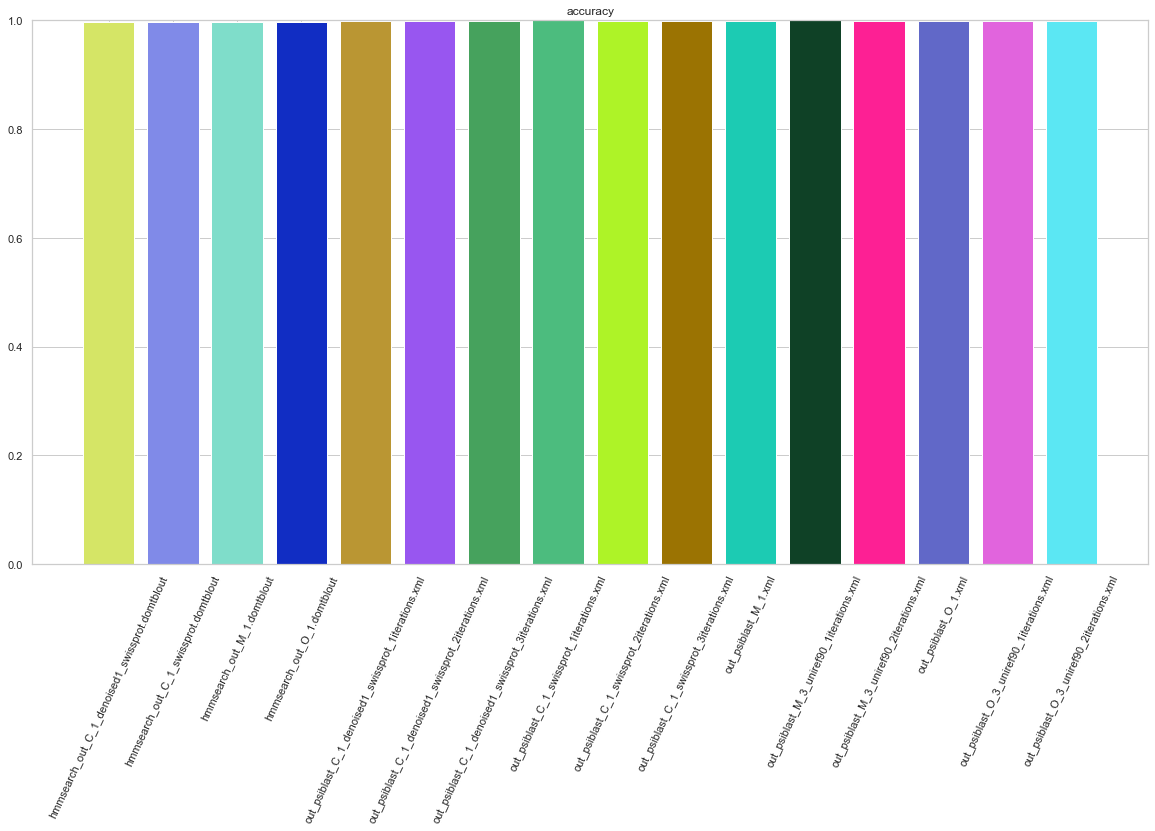

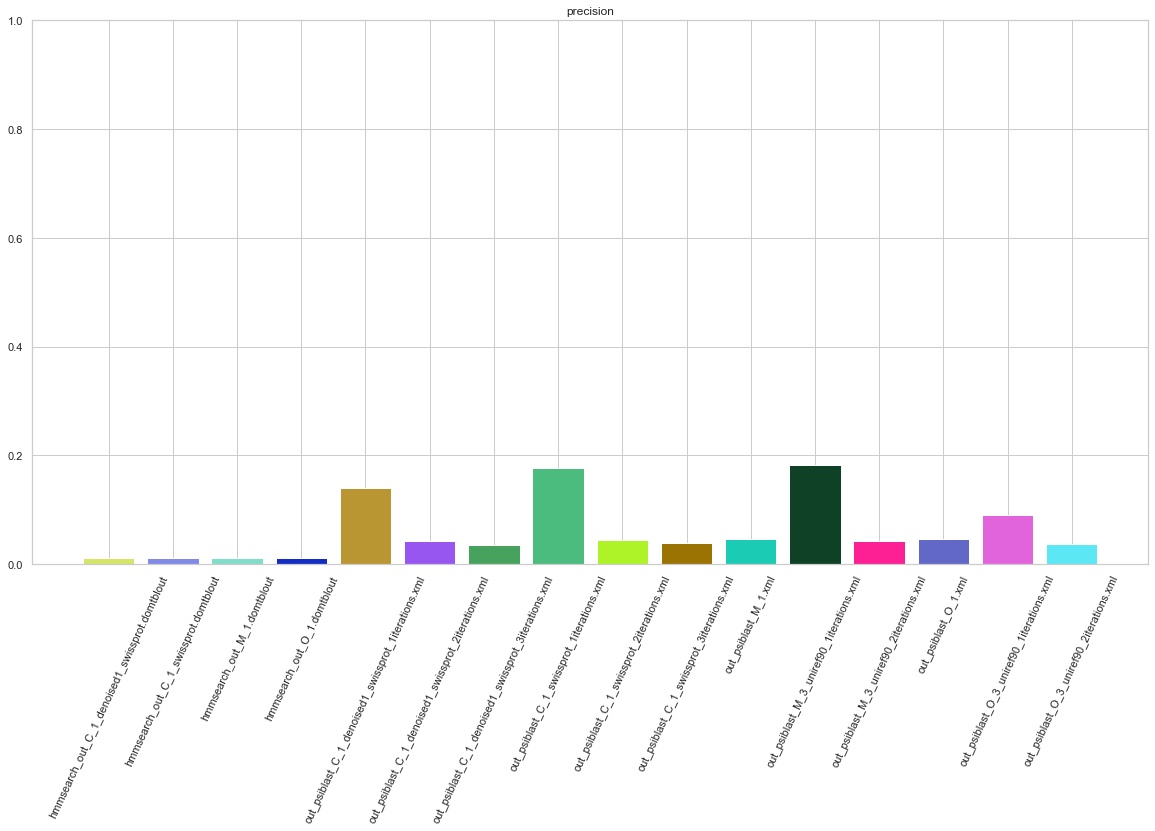

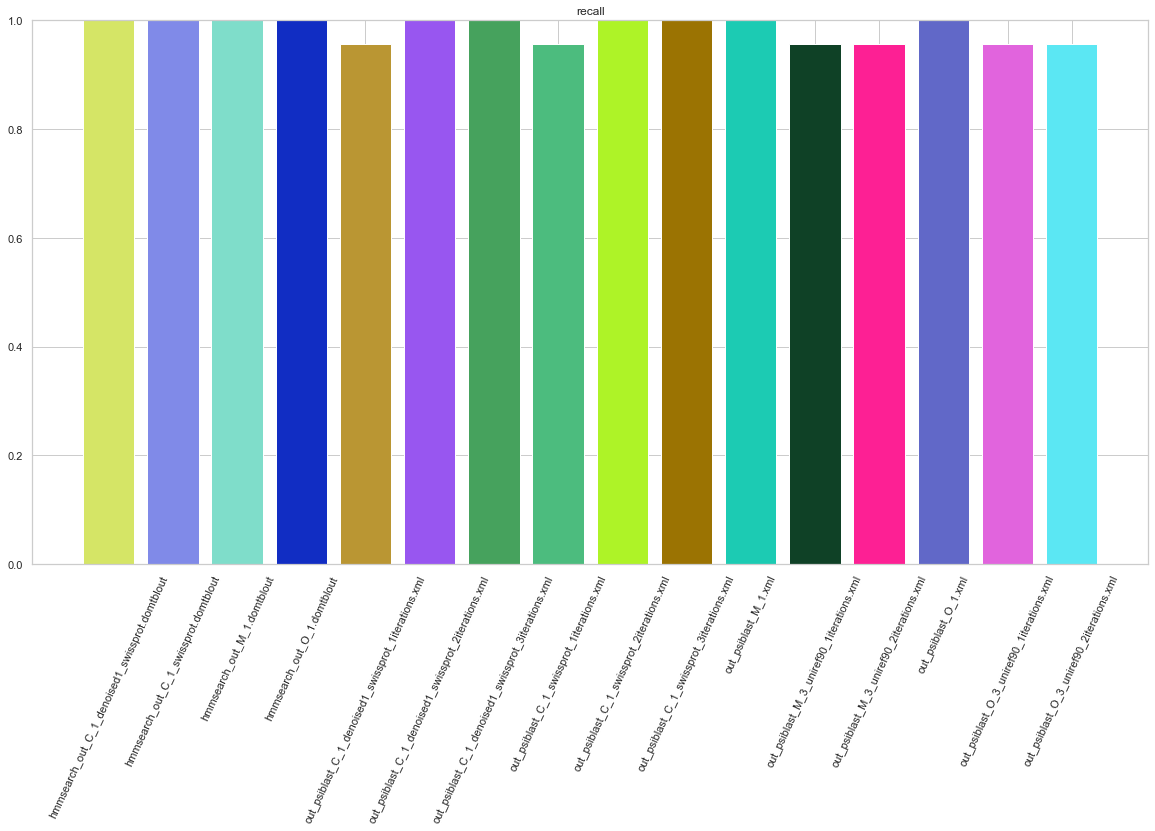

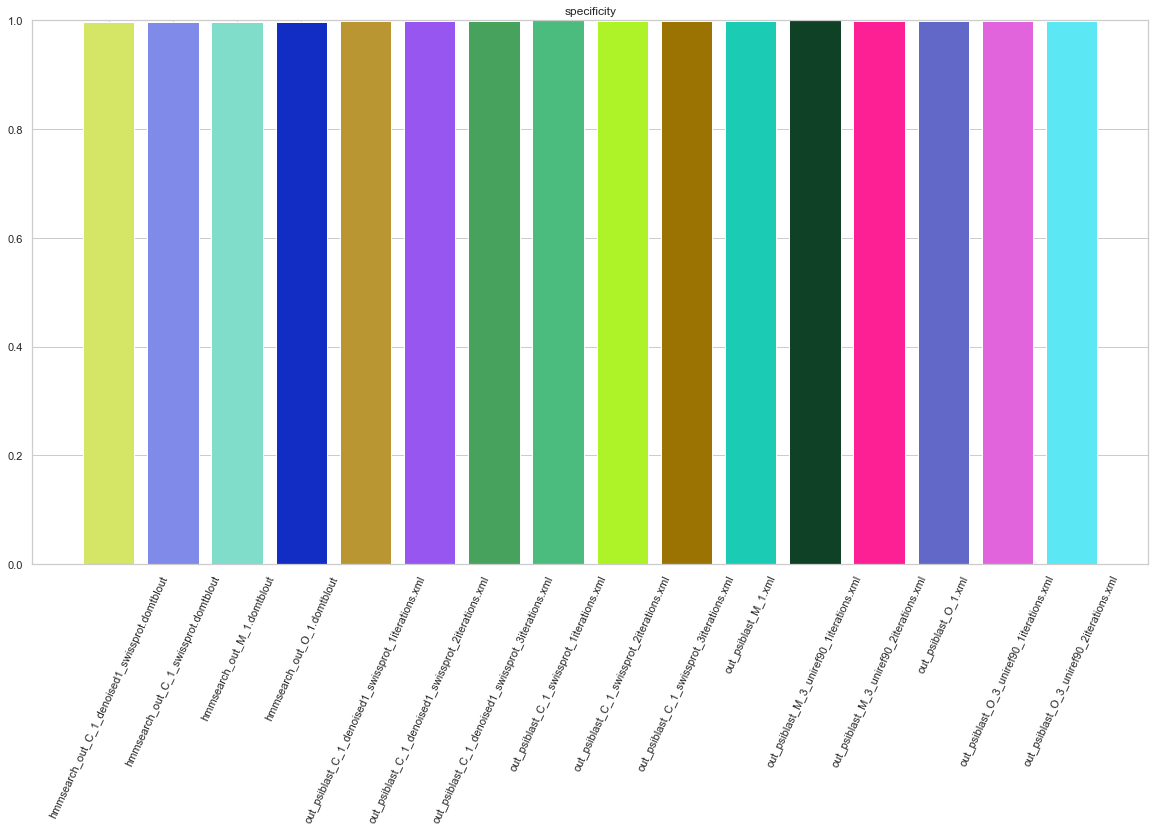

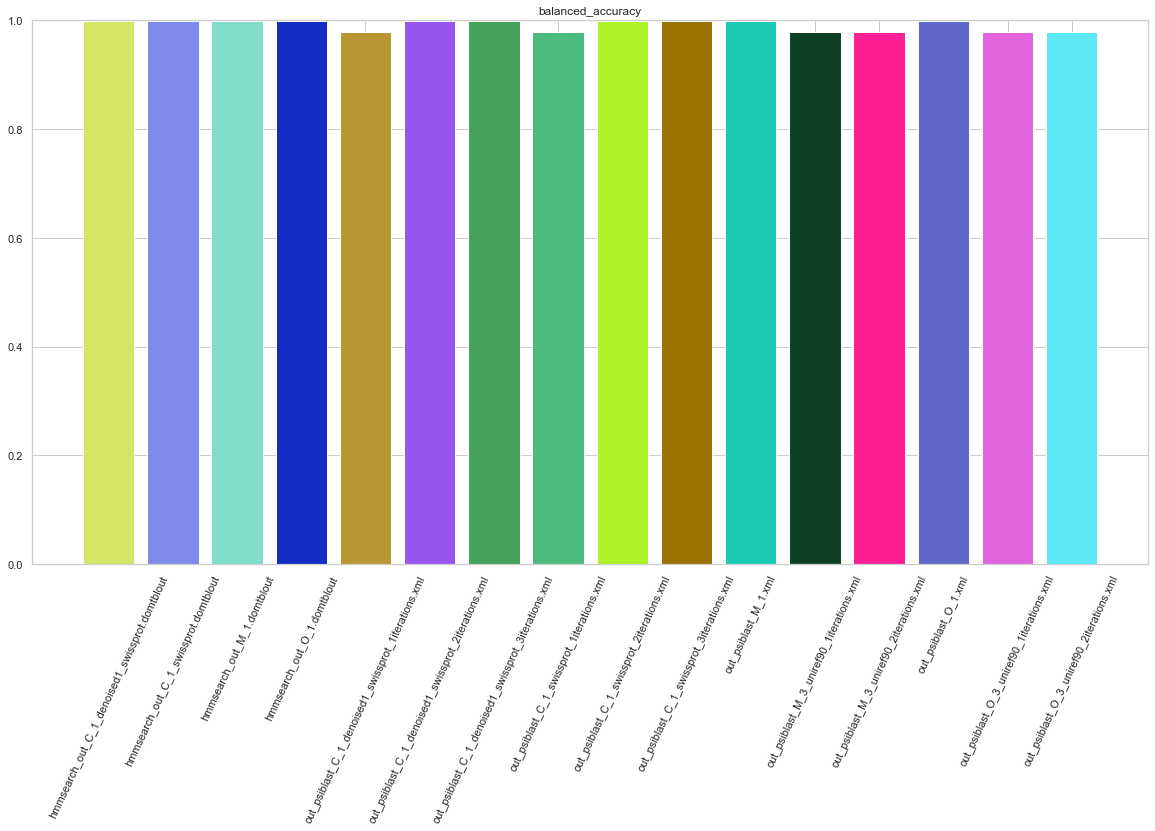

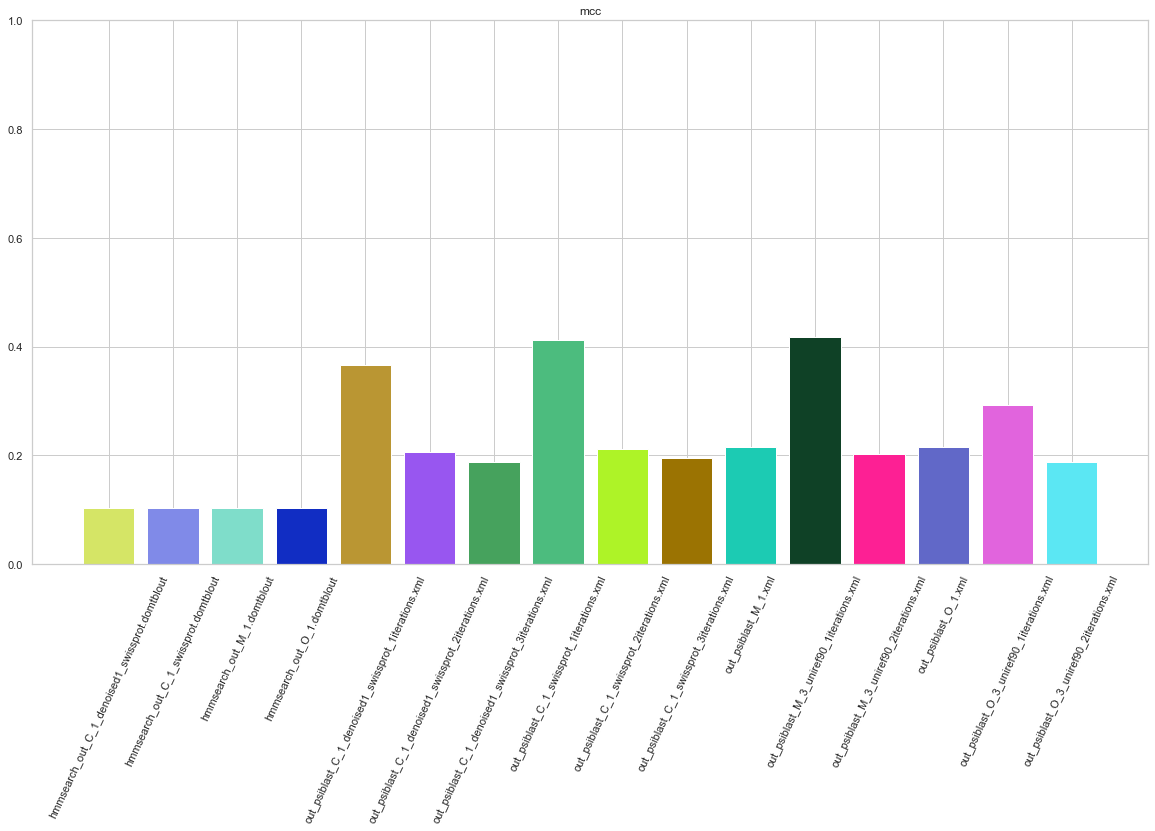

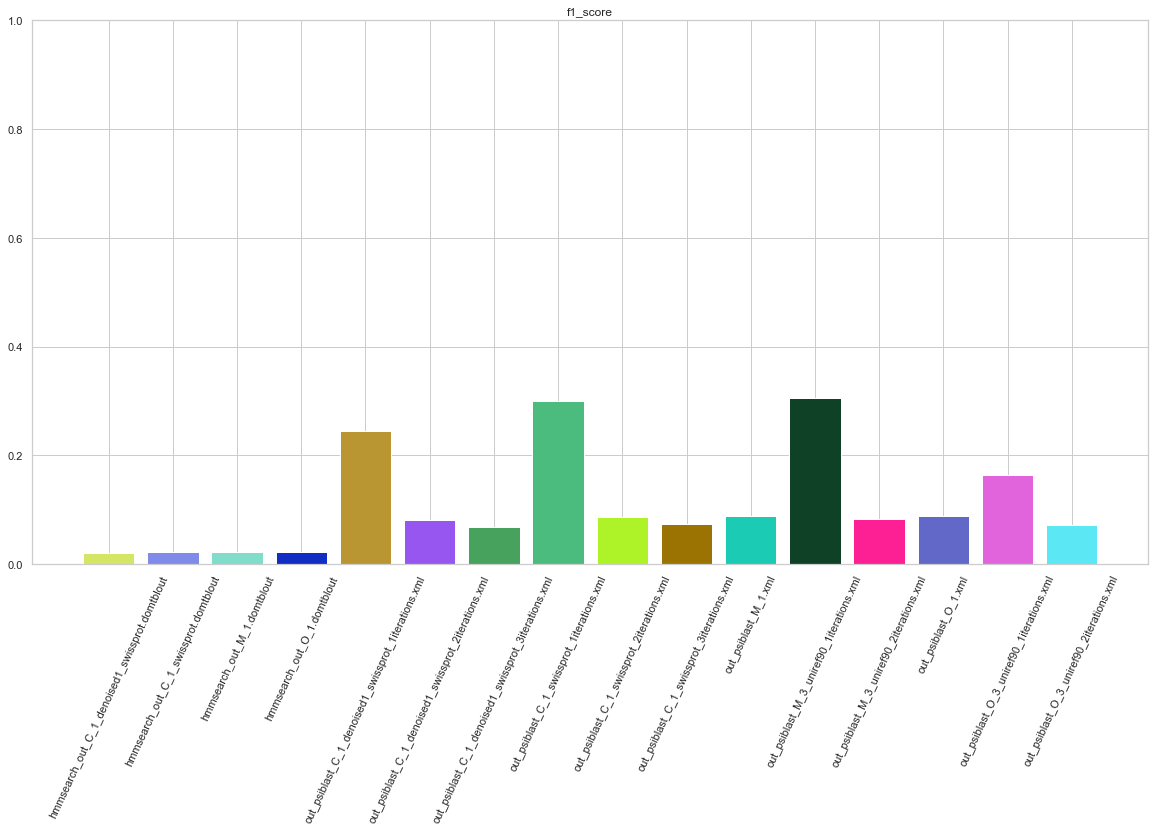

In [5]:
plot_metrics_8(metrics_df)

# 9 - Evaluate the ability of matching domain positions
Here we want to evaluate how good our model is at estimating domain positions inside the found proteins.

In [6]:
metrics_df, conf_df = metrics_9(parsed_domtblouts, parsed_psiblast, gt)
metrics_df

,accuracy,precision,recall,specificity,balanced_accuracy,mcc,f1_score
hmmsearch_out_C_1_denoised1_swissprot.domtblout,0.771177,0.049190,0.987158,0.768558,0.877858,1.609784,0.093710
hmmsearch_out_C_1_swissprot.domtblout,0.771426,0.049998,0.997641,0.768665,0.883153,NaN,0.095223
hmmsearch_out_M_1.domtblout,0.775920,0.050151,0.980868,0.773421,0.877144,NaN,0.095423
hmmsearch_out_O_1.domtblout,0.776423,0.050043,0.980605,0.773944,0.877275,NaN,0.095227
out_psiblast_C_1_denoised1_swissprot_1iterations.xml,0.641851,0.266011,0.956362,0.593389,0.774876,0.374273,0.416244
out_psiblast_C_1_denoised1_swissprot_2iterations.xml,0.418514,0.061781,0.990958,0.395521,0.693239,NaN,0.116310
out_psiblast_C_1_denoised1_swissprot_3iterations.xml,0.342912,0.046111,0.990958,0.321462,0.656210,0.319688,0.088121
out_psiblast_C_1_swissprot_1iterations.xml,0.598218,0.297816,0.964749,0.521040,0.742894,0.371285,0.455133
out_psiblast_C_1_swissprot_2iterations.xml,0.365238,0.060925,1.000000,0.337975,0.668987,NaN,0.114852
out_psiblast_C_1_swissprot_3iterations.xml,0.280863,0.046924,1.000000,0.254466,0.627233,NaN,0.089643


In [7]:
conf_df

,true_positives,true_negatives,false_positives,false_negatives
hmmsearch_out_C_1_denoised1_swissprot.domtblout,7533,483525,145608,98
hmmsearch_out_C_1_swissprot.domtblout,7613,480647,144654,18
hmmsearch_out_M_1.domtblout,7485,483907,141764,146
hmmsearch_out_O_1.domtblout,7483,486323,142047,148
out_psiblast_C_1_denoised1_swissprot_1iterations.xml,7298,29387,20137,333
out_psiblast_C_1_denoised1_swissprot_2iterations.xml,7562,75141,114839,69
out_psiblast_C_1_denoised1_swissprot_3iterations.xml,7562,74112,156435,69
out_psiblast_C_1_swissprot_1iterations.xml,7362,18883,17358,269
out_psiblast_C_1_swissprot_2iterations.xml,7631,60048,117622,0
out_psiblast_C_1_swissprot_3iterations.xml,7631,52902,154992,0


In [11]:
list(parsed_domtblouts.keys())

['hmmsearch_out_C_1_denoised1_swissprot.domtblout',
 'hmmsearch_out_C_1_swissprot.domtblout',
 'hmmsearch_out_M_1.domtblout',
 'hmmsearch_out_O_1.domtblout']